In [ ]:
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;

In [15]:
require 'daru'
require 'gnuplotrb'
include GnuplotRB
include GnuplotRB::Fit

df = Daru::DataFrame.new({
  Build: [336, 469, 412, 378],
  Test: [657, 920, 1200, 1134],
  Deploy: [190, 389, 312, 288]
  },
  index: ['First Run', 'Second Run', 'Third Run', 'Fourth Run']
)
df[:Overall] = df[:Build] + df[:Test] + df[:Deploy]
df

,Build,Deploy,Test,Overall
First Run,336,190,657,1183
Second Run,469,389,920,1778
Third Run,412,312,1200,1924
Fourth Run,378,288,1134,1800


### ' spreadsheet ' and ' mechanize '  helps deal with comma delimited data
cmd = `sudo gem install spreadsheet mechanize`

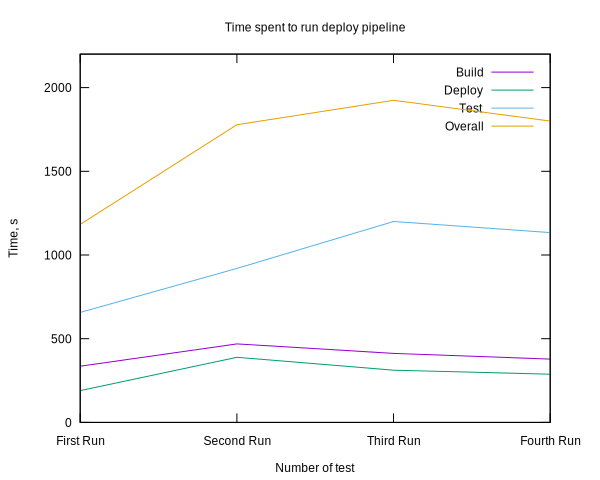

In [16]:
from_daru = Plot.new(
    df,
    style_data: 'lines',
    yrange: 0..2200,
    xlabel: 'Number of test',
    ylabel: 'Time, s',
    title: 'Time spent to run deploy pipeline'
)

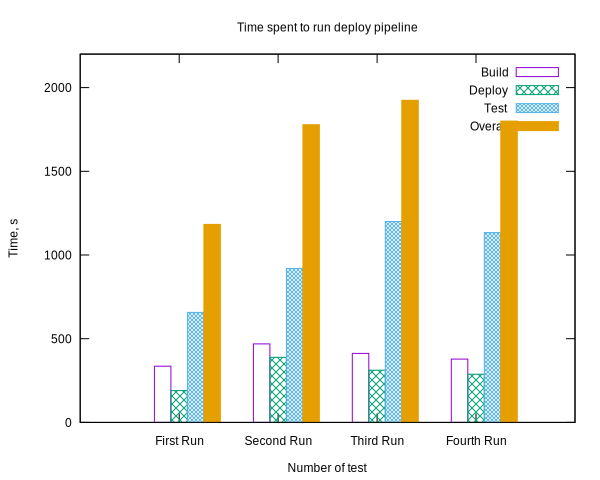

In [17]:
from_daru.options(
    style_data: 'histograms',
    style_fill: 'pattern border'
)

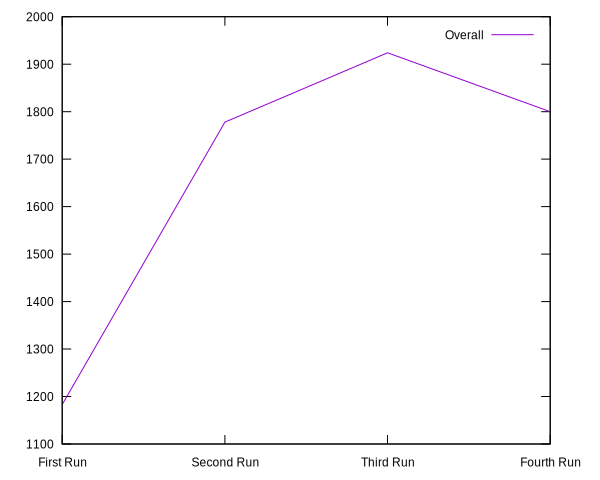

In [18]:
Plot.new([df[:Overall], with: 'lines'])

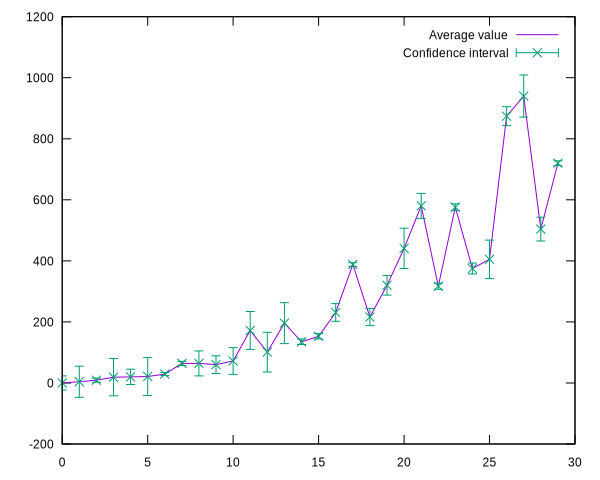

In [19]:
rows = (1..30).map do |i|
  [i**2 * (rand(4) + 3) / 5, rand(70)]
end
df = Daru::DataFrame.rows(rows, order: [:Value, :Error], name: 'Confidence interval')

random_points = Plot.new(
  [df[:Value], with: 'lines', title: 'Average value'],
  [df, with: 'err']
)

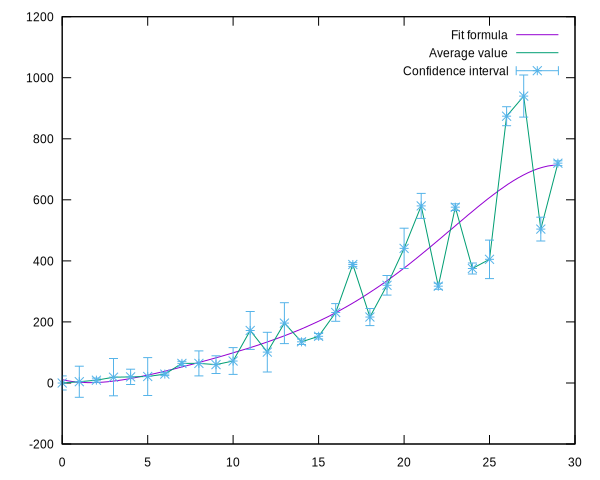

In [20]:
poly = fit_poly(df, degree: 5)
random_points.add_dataset(poly[:formula_ds])

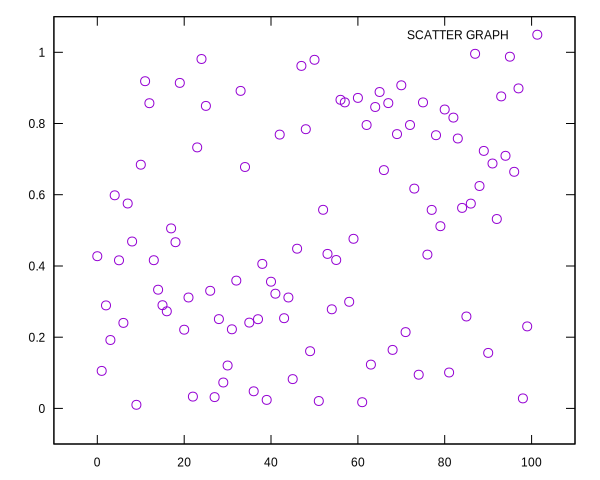

In [25]:
df = Daru::DataFrame.new({
    a: Array.new(100) {|i| i}, 
    b: 100.times.map{rand}
  },
  name: 'SCATTER GRAPH'
)

Plot.new([df, pt: 6, ps: 1, using: '2:3'], xrange: -10..110, yrange: -0.1..1.1)

In [32]:
require 'daru'
require 'gnuplotrb'
include GnuplotRB

index  = Daru::DateTimeIndex.date_range(:start => DateTime.new(2017,2,1), periods: 100)
vector = Daru::Vector.new(Array.new(10){ [1,2,3,4,5].shuffle }.flatten, index: index)

2017-02-01T00:00:00+00:00,4
2017-02-02T00:00:00+00:00,2
2017-02-03T00:00:00+00:00,5
2017-02-04T00:00:00+00:00,1
2017-02-05T00:00:00+00:00,3
2017-02-06T00:00:00+00:00,5
2017-02-07T00:00:00+00:00,2
2017-02-08T00:00:00+00:00,4
2017-02-09T00:00:00+00:00,3
2017-02-10T00:00:00+00:00,1
2017-02-11T00:00:00+00:00,4


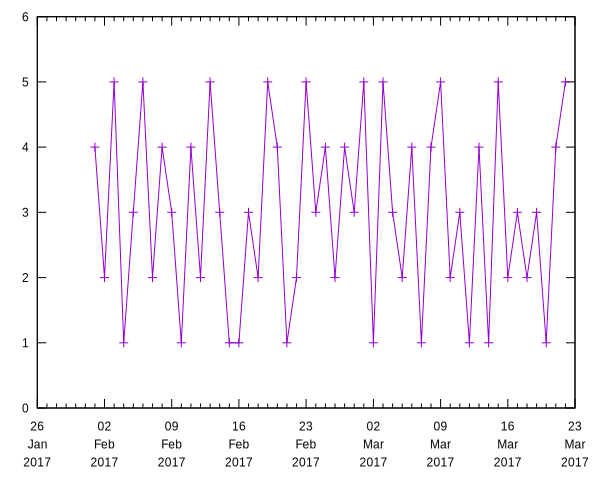

In [33]:
vector_plot = Plot.new([vector, with: 'linespoints'], yrange: 0..6)

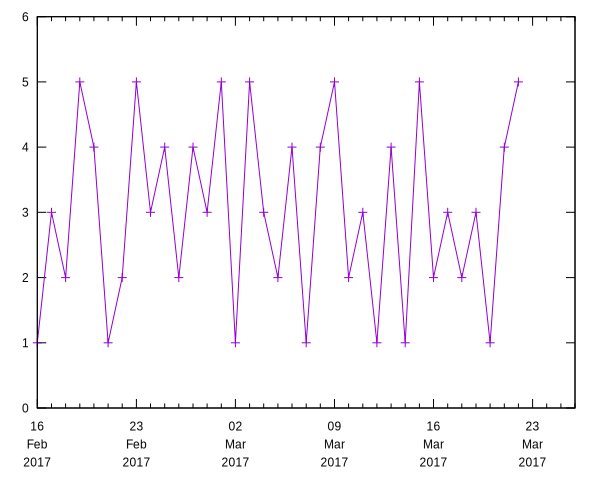

In [34]:
vector_plot.xrange('["2017-02-16":"2017-03-26"]')

In [35]:
df = Daru::DataFrame.new({
    'Jupyter Projects' => [1, 2, 3, 4, 5].shuffle,
    'Ruby Projects' => [1, 2, 3, 4, 5].shuffle,
  },
  index: index
)

,Jupyter Projects,Ruby Projects
2017-02-01T00:00:00+00:00,5,2
2017-02-02T00:00:00+00:00,1,4
2017-02-03T00:00:00+00:00,3,5
2017-02-04T00:00:00+00:00,4,3
2017-02-05T00:00:00+00:00,2,1
2017-02-06T00:00:00+00:00,,
2017-02-07T00:00:00+00:00,,
2017-02-08T00:00:00+00:00,,
2017-02-09T00:00:00+00:00,,
2017-02-10T00:00:00+00:00,,


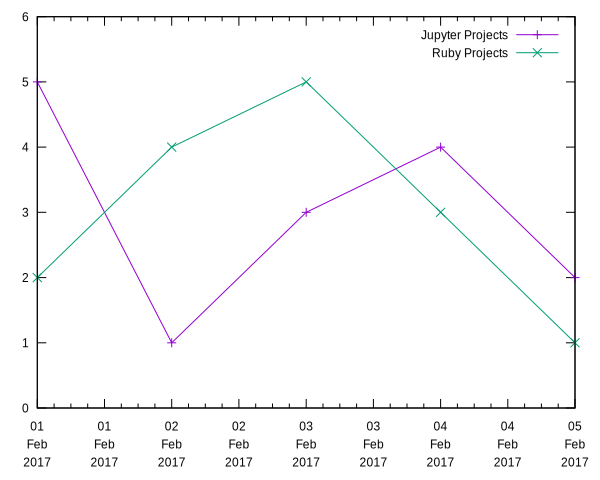

In [36]:
p = Plot.new(
  df,
  style_data: 'linespoints',
  yrange: 0..6
)

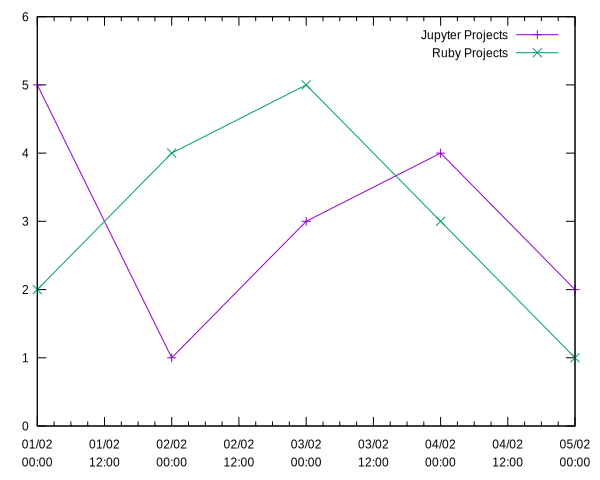

In [37]:
p.format_x('%d/%m\n%H:%M')